# Time Series Analysis.

* Time Series Analysis is aggreating a numerical data by differet time frequencies( 1Day, 2Months, 1Year, 200Milliseconds etc).
* This needs a software that supports such features set.
* Luckily in Python this is supported check outthe [docs](https://pandas.pydata.org/docs/user_guide/timeseries.html#dateoffset-objects) for data offsets.
* In this project we will showcase some simple examples for Time Frequency aggregations then we'll visualize our results using line plots.
* Datasets
    * [`daily-total-female-births-CA.csv`](https://www.kaggle.com/dougcresswell/daily-total-female-births-in-california-1959).
    * [`Sunspots.csv`](https://www.kaggle.com/robervalt/sunspots).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.style.use("dark_background")

In [3]:
sunspots = pd.read_csv("Sunspots.csv")

In [4]:
sunspots.drop(columns=["Unnamed: 0"],inplace=True)

In [5]:
x = sunspots.set_index("Date")
x

,Monthly Mean Total Sunspot Number
Date,
1749-01-31,96.7
1749-02-28,104.3
1749-03-31,116.7
1749-04-30,92.8
1749-05-31,141.7
...,...
2020-09-30,0.6
2020-10-31,14.4
2020-11-30,34.0


In [6]:
x.index = pd.to_datetime(x.index)
x.index

DatetimeIndex(['1749-01-31', '1749-02-28', '1749-03-31', '1749-04-30',
               '1749-05-31', '1749-06-30', '1749-07-31', '1749-08-31',
               '1749-09-30', '1749-10-31',
               ...
               '2020-04-30', '2020-05-31', '2020-06-30', '2020-07-31',
               '2020-08-31', '2020-09-30', '2020-10-31', '2020-11-30',
               '2020-12-31', '2021-01-31'],
              dtype='datetime64[ns]', name='Date', length=3265, freq=None)

* Here we'll be aggregating Sunspot by 1 Year time frequency.
* We can aggregate by different functions like count, mean, max checkout the [docs](https://pandas.pydata.org/docs/user_guide/groupby.html#groupby-object-attributes).

In [7]:
y = x.resample(rule="A").sum()
y.rename(columns={"Monthly Mean Total Sunspot Number":"Total Yearly Sunspot Number"},inplace=True)
y

,Total Yearly Sunspot Number
Date,
1749-12-31,1618.5
1750-12-31,1668.0
1751-12-31,953.3
1752-12-31,956.0
1753-12-31,613.5
...,...
2017-12-31,261.8
2018-12-31,84.1
2019-12-31,43.0


In [8]:
## import newly data to TotalYSN
y.to_csv('TotalYSN.csv')

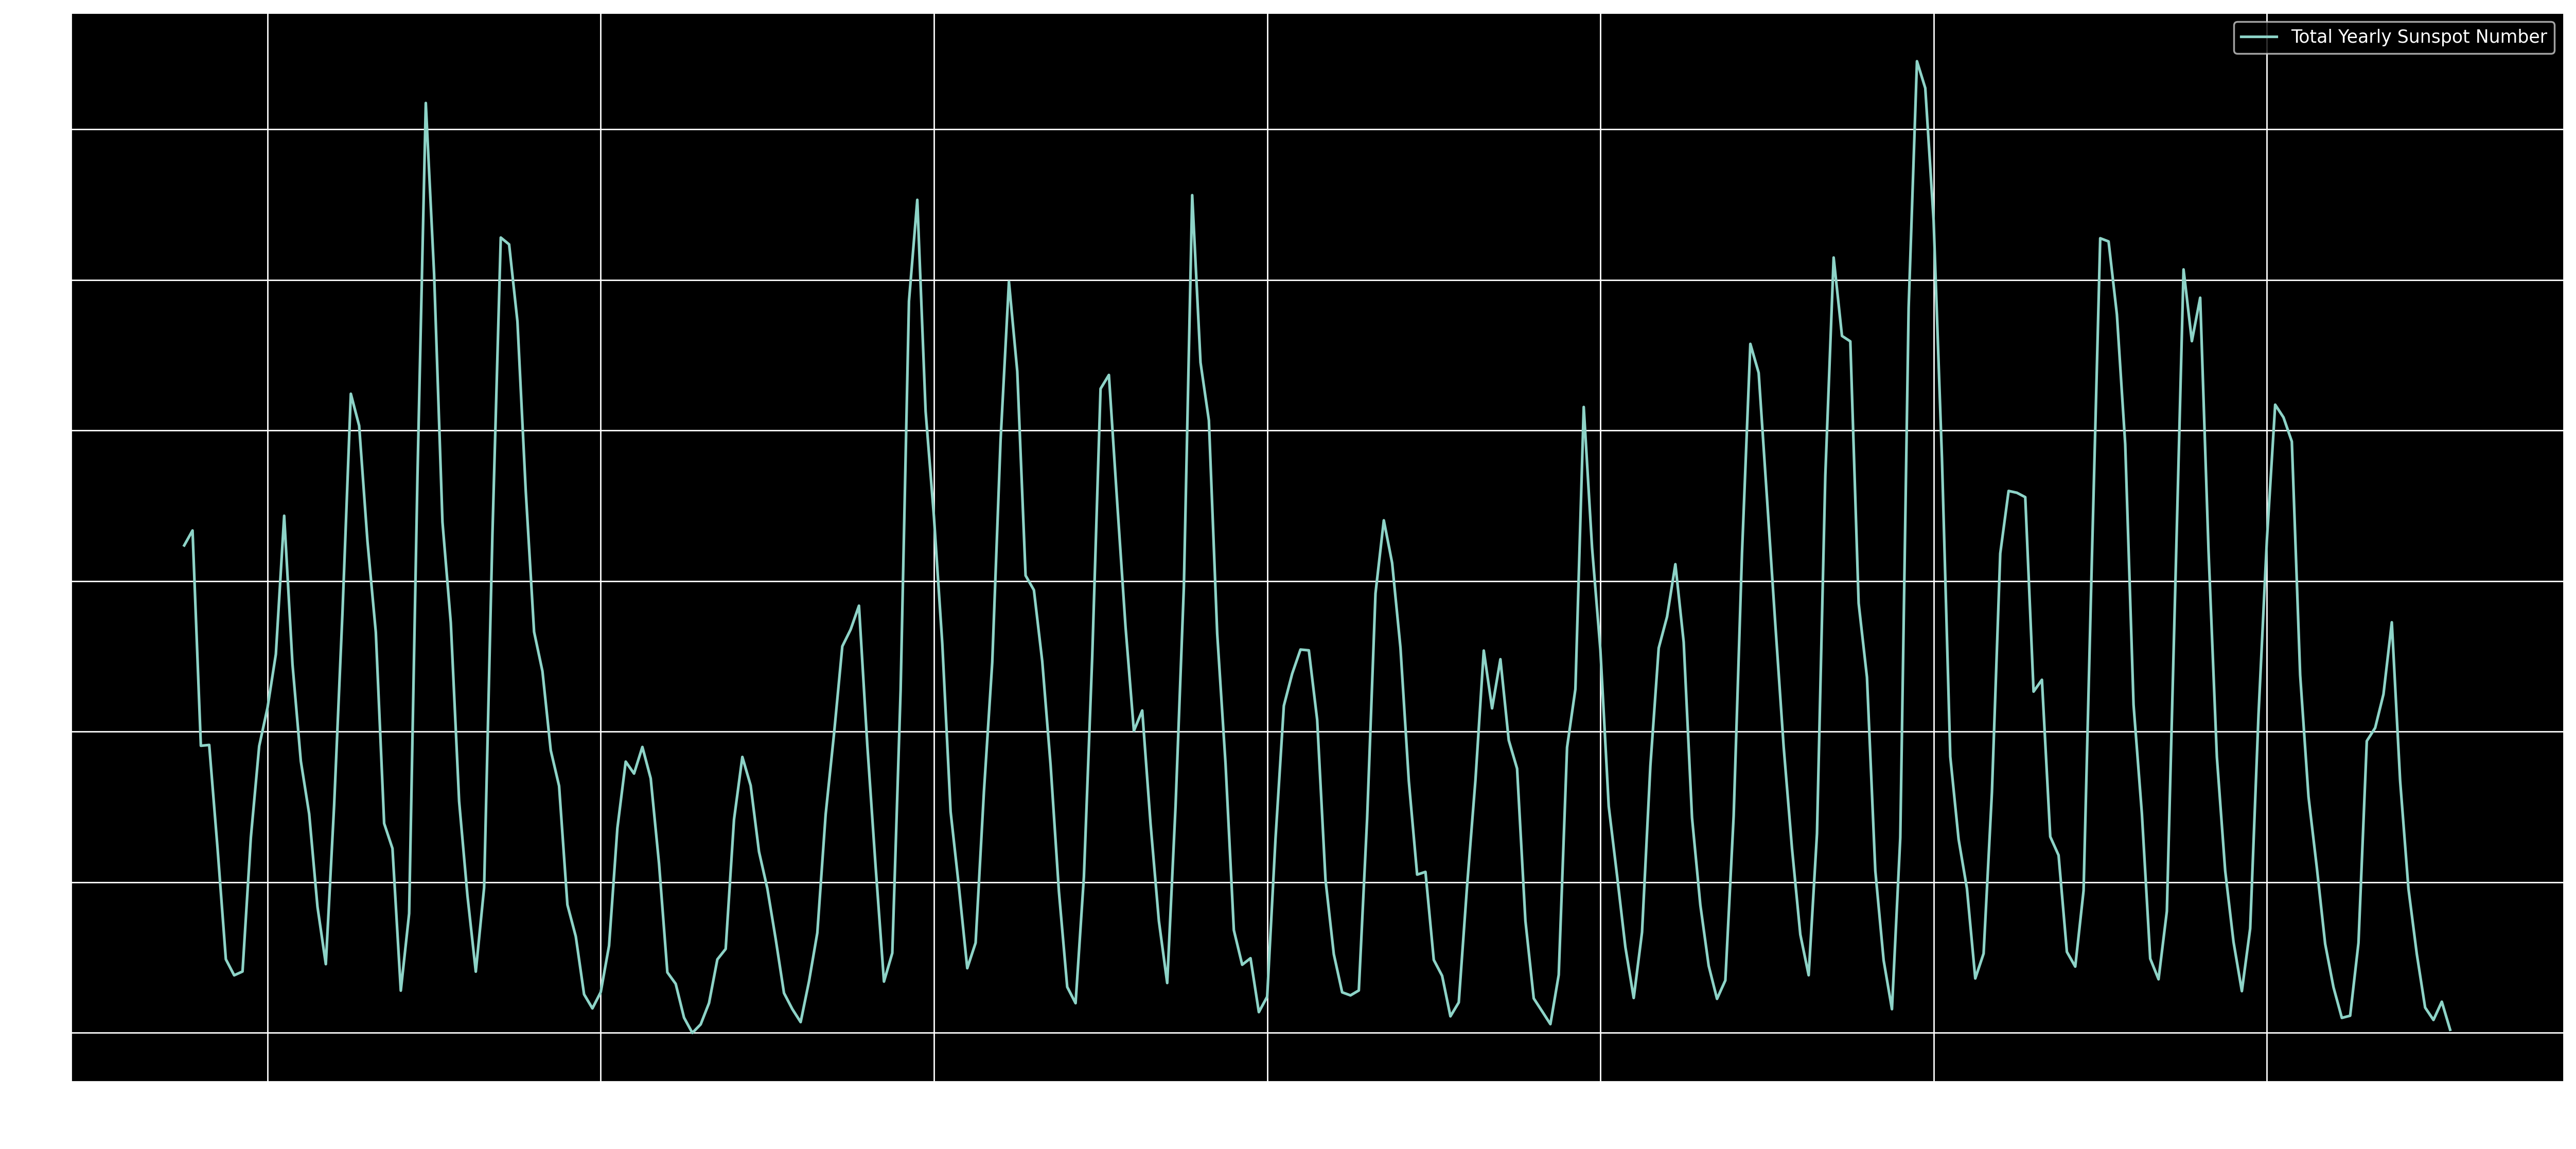

In [9]:
plt.figure(figsize=(25,11),dpi=250);
plt.grid(which="both");
sns.lineplot(data=y);

***

In [10]:
daily_total_female_births = pd.read_csv("daily-total-female-births-CA.csv")
daily_total_female_births.set_index('date',inplace=True)
daily_total_female_births

,births
date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44
...,...
1959-12-27,37
1959-12-28,52
1959-12-29,48


* Looking at our data we'll be sum aggregating by 1 month frequency. 

In [11]:
daily_total_female_births.index = pd.to_datetime(daily_total_female_births.index)

In [12]:
x = daily_total_female_births.resample(rule="M").sum()
x

,births
date,
1959-01-31,1213
1959-02-28,1148
1959-03-31,1218
1959-04-30,1195
1959-05-31,1208
1959-06-30,1212
1959-07-31,1300
1959-08-31,1351
1959-09-30,1446


In [13]:
x.rename(columns={"births":"Yearly Total Births"},inplace=True)

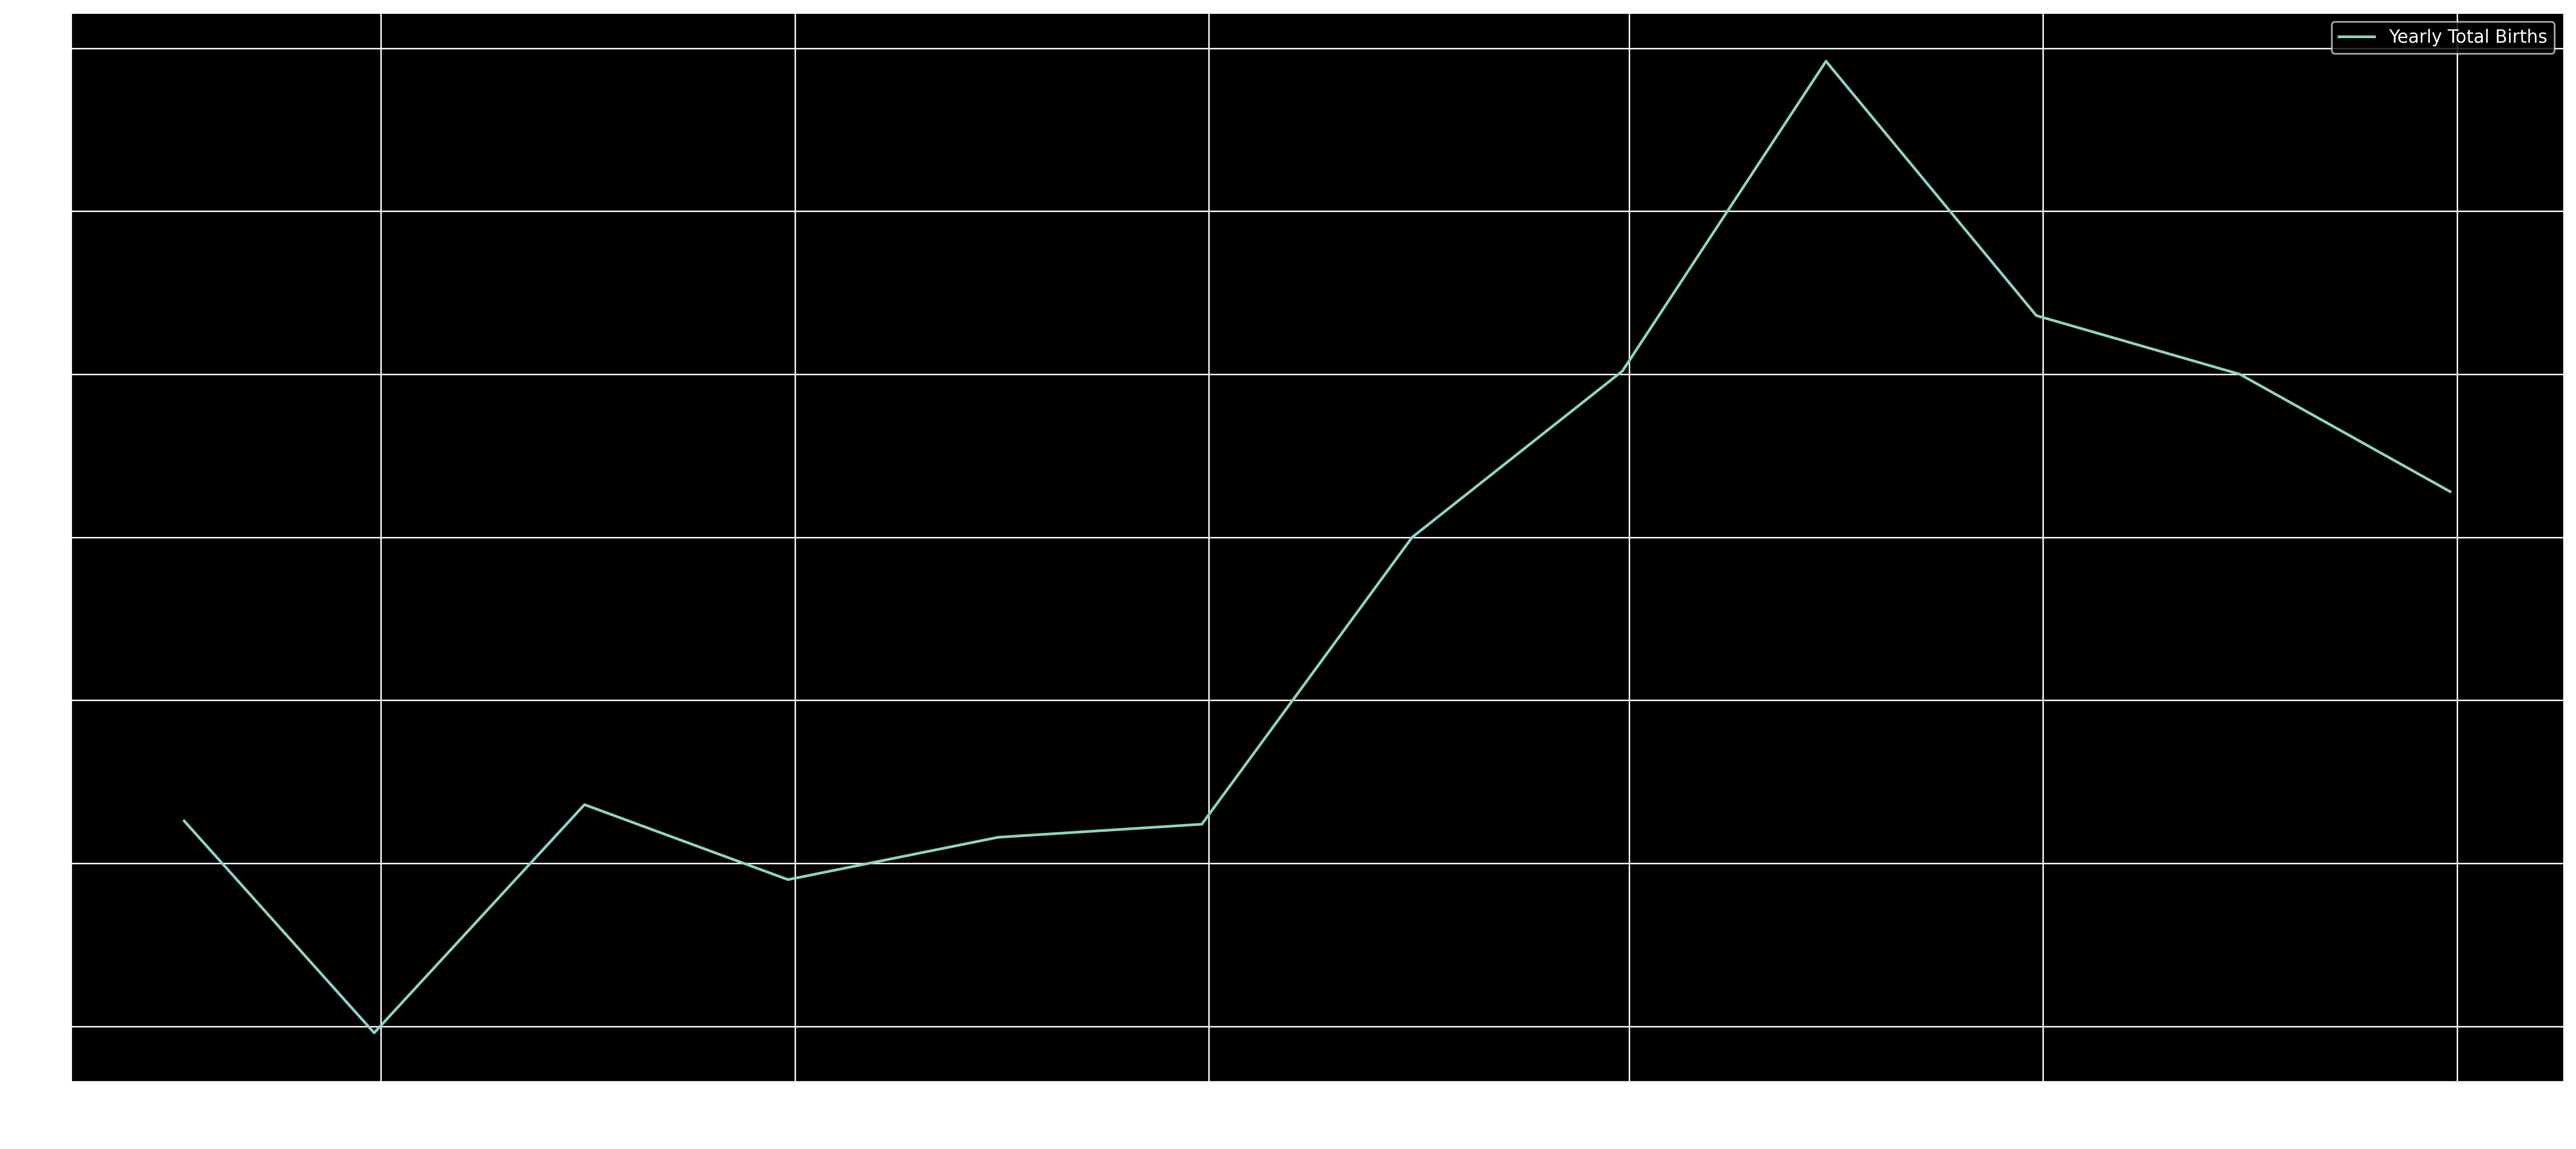

In [14]:
plt.figure(figsize=(25,11),dpi=250);
plt.grid(which="both");
sns.lineplot(data=x);

***